# Credit Card Fraud Detection

### Introduction




We will be exploring and modeling using classification models:
* Naive Bayes
* Decision Trees
* Logistic Regression

After we have fit the data to the models, we will evaluate the differences between each one and determine which one is the better fit or better at predicting credit card fraud.

##### Data

The data we will be analyzing is provided by the Machine Learning Group - ULB, the research unit of the Computer Science Department of the Université Libre de Bruxelles, Brussels, Belgium, on [kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud). Correctly cited references will be at the end of this report.

The data contains credit card transactions made over the course of two days in September 2012 by European cardholders.

## Data Exploration

#### Package/Library Import

Make sure to have these packages installed to be able to utilize them and run the following code blocks

* pandas - reading in data
* numpy - array manipulation
* matplotlib - visualization/plotting
* sklearn - modeling/visualization
* seaborn - visualization

In [1]:
#Preparation
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV

# Visualizations 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# ML Models
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation Metrics
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split

import warnings; warnings.simplefilter('ignore')
from termcolor import colored as cl

#### Reading in the Data

Here, we read in our data using the pandas package.

In [ ]:
data = pd.read_csv("creditcard.csv")

data.head()

After outputting the sum of any null values in the principal components, we see that there are none, but to make sure we also print using the .any() function and the output is False.

In [6]:
print(data.isnull().sum())
print("Missing Values:", data.isnull().values.any())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Missing Values: False


Looking at the data, we can see there is an extreneous column, *Time*, that we do not need, so we can "drop" it to make it easier for our analysis.

In [8]:
# data.drop('Time', axis = 1, inplace = True)
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [10]:
total_cases = len(data)
non_fraud = len(data[data.Class == 0])
fraud = len(data[data.Class == 1])

print("Total cases:", total_cases)
print("Fraud:", fraud)
print("Non-fraud:", non_fraud)

percent = str((fraud/non_fraud)*100)
print("Fraud Percentage =", percent + '%')

Total cases: 284807
Fraud: 492
Non-fraud: 284315
Fraud Percentage = 0.17304750013189596%


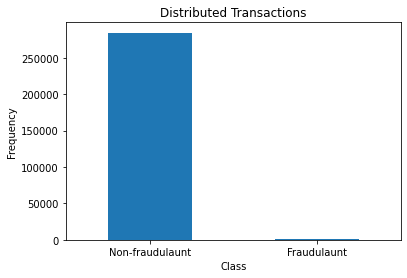

In [12]:
colors = ["#0101DF", "#DF0101"]
count_classes = pd.value_counts(data['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Distributed Transactions")
plt.xticks(range(2), ['Non-fraudulaunt', 'Fraudulaunt'])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

From looking at the graph and the output before, it is clear that the data is unbalanced and there is a greater amount of normal, non-fraudalant transactions in comparison to fraudalant ones. This can cause problems for when we begin modeling.

~~## Balancing the Data~~

~~Before we split the data for our cross validation, we will balance it. There are many ways to balance but the route that I chose is by undersampling the majority class, which in this case is, *non-fraudulaunt*.~~

In [14]:
# count_classes = pd.value_counts(balanced_data['Class'], sort=True)
# count_classes.plot(kind='bar', rot=0)
# plt.title("Distributed Transactions")
# plt.xticks(range(2), ['Non-fraudulaunt', 'Fraudulaunt'])
# plt.xlabel("Class")
# plt.ylabel("Frequency")
# plt.show()

In [16]:
# fraud_data = data.loc[data['Class'] == 1]
# non_fraud_data = data.loc[data['Class'] == 0][:492]

# balanced_data = pd.concat([fraud_data, non_fraud_data])

# new_data = balanced_data.sample(frac=1, random_state=45)
# balanced_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


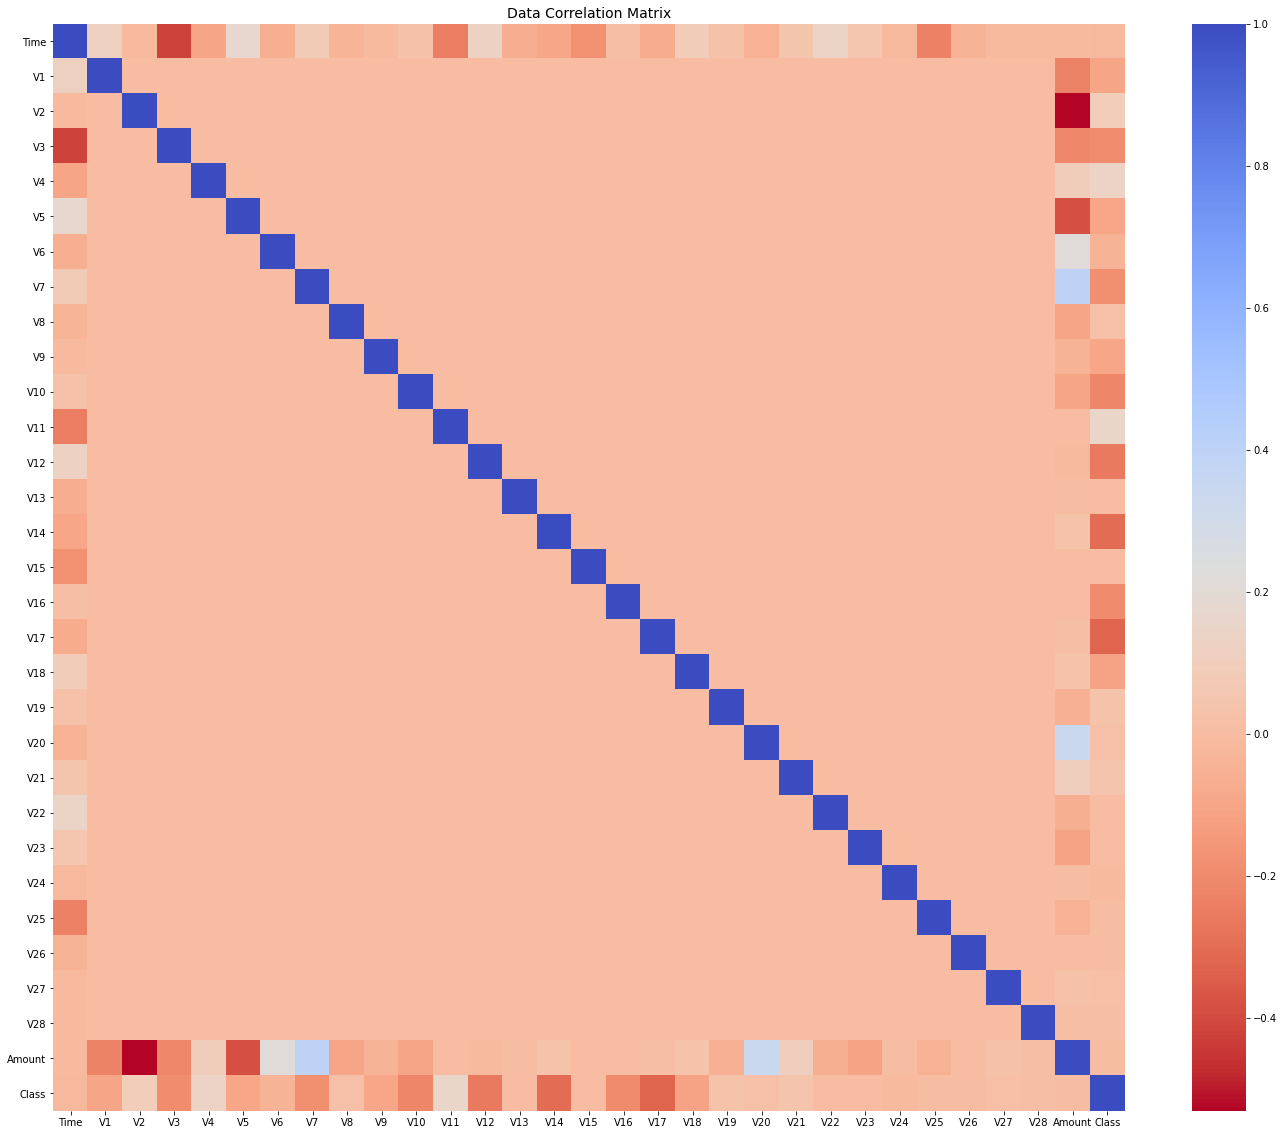

In [18]:
fig, ax = plt.subplots(1, figsize=(24,20))

data_correlation = data.corr()
sns.heatmap(data_correlation, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax)
ax.set_title('Data Correlation Matrix', fontsize=14)
plt.show()

## Splitting the Data

In [20]:
x = data.drop('Class', axis=1)
y = data['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,  stratify=y)

std_scale = StandardScaler().fit(x_train)
x_train_std = std_scale.transform(x_train)
x_test_std = std_scale.transform(x_test)

x_train_under, y_train_under = RandomUnderSampler(random_state=42).fit_resample(x_train_std, y_train)

## Modeling

In [22]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "GaussianNB": GaussianNB()
}

In [24]:
for key, classifier in classifiers.items():
    classifier.fit(x_train_under, y_train_under)
    training_score = cross_val_score(classifier, x_train_under, y_train_under, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression has a training score of 95.0 % accuracy score
Classifiers:  DecisionTreeClassifier has a training score of 92.0 % accuracy score
Classifiers:  GaussianNB has a training score of 92.0 % accuracy score


In [26]:
logit_params = {"penalty": ['l1', 'l2'], 'C': [0, 4, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=10000), logit_params, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
grid_log_reg.fit(x_train_under, y_train_under)
logit_best = grid_log_reg.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [28]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(x_train, y_train)
tree_best = grid_tree.best_estimator_

In [ ]:
gnb = GaussianNB()
gnb_model = gnb.fit(x_train_under, y_train_under)

## Evaluation

In [428]:
def roc_scores(x_value, y_value):
    #in sample
    model_list = [logit_best, tree_best, gnb_model]
    model_name = ['Logistic Regression','Decision Trees', 'Naive Bayes']
    # Plot ROC curve for all my models
    fig, ax = plt.subplots(figsize=(20,18))
    for i, model in enumerate(model_list):
        y_pred = list(model.predict_proba(x_value)[:,1])
        fpr, tpr, threshold = metrics.roc_curve(y_value, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label = (model_name[i] + ' AUC = %0.4f' % roc_auc),linewidth=2.0)
    ax.grid(False)
    ax.tick_params(length=6, width=2,labelsize = 30,
                   grid_color='r', grid_alpha=0.5)
    # plt.legend(loc = 'lower right',prop={'size': 25})
    leg = plt.legend(loc = 'lower right',prop={'size': 25})
    leg.get_frame().set_edgecolor('b')
    plt.title('Receiver Operating Characteristic (ROC)', FontSize=40)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02])
    plt.ylabel('True Positive Rate',FontSize=30)
    plt.xlabel('False Positive Rate',FontSize=30)
    plt.show()

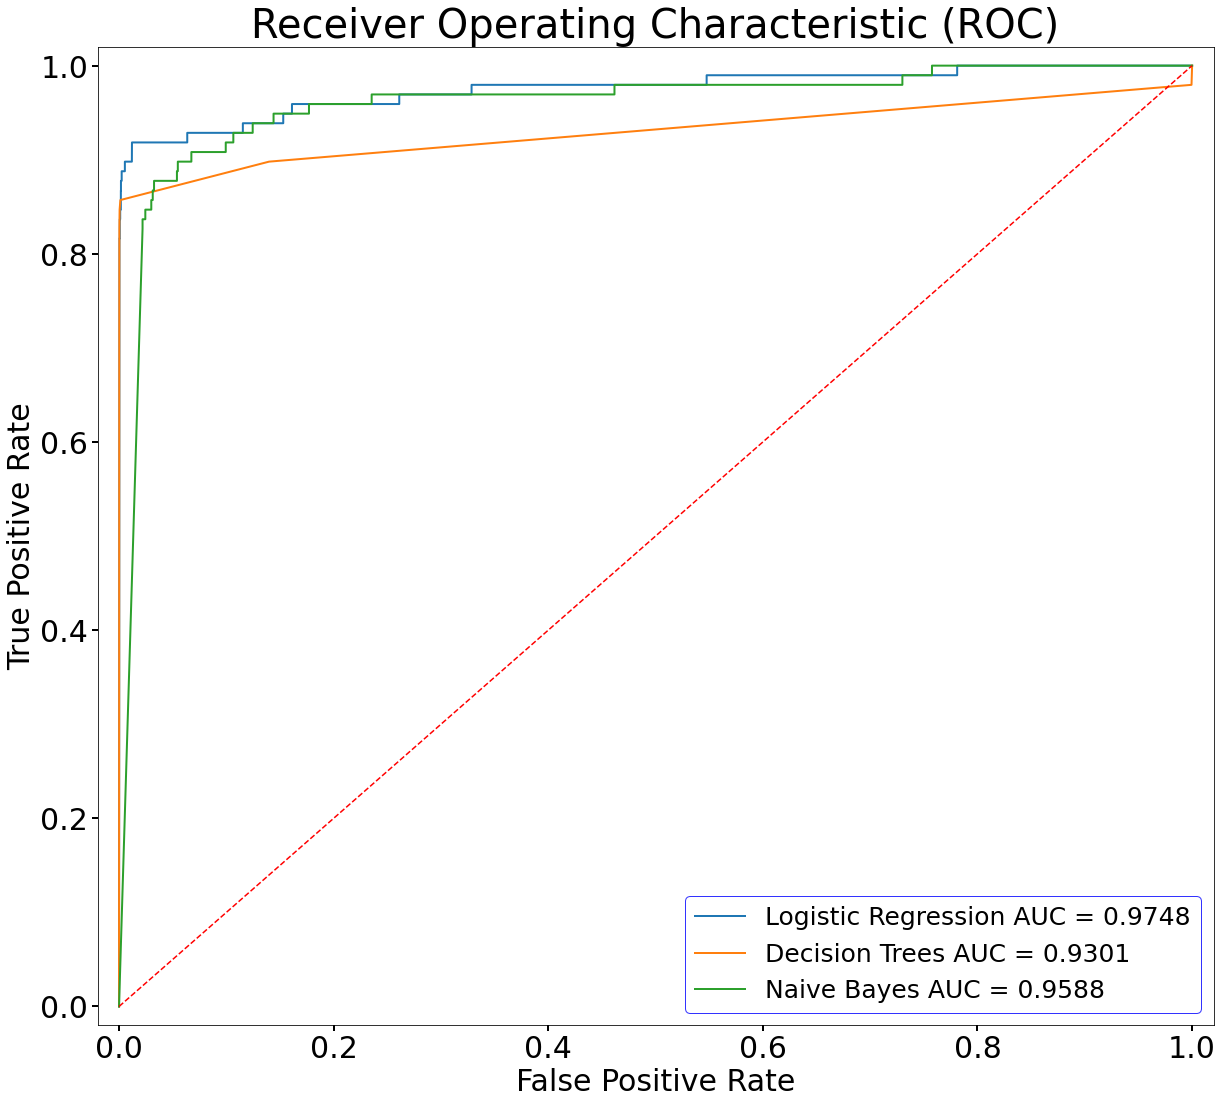

In [429]:
roc_scores(x_test_std, y_test)

In [445]:
def find_best_threshold(model, int_num_steps):
    highest_f1 = 0
    best_threshold = 0
    for threshold in np.linspace (0, 1, int_num_steps):
        y_predict = (model.predict_proba(x_val_under)[:, 1] >= threshold) 
        f1 = f1_score(y_val_under,y_predict)
        acc = accuracy_score(y_val_under,y_predict)
        rec = recall_score(y_val_under,y_predict)
        pre = precision_score(y_val_under,y_predict)
        if f1 > highest_f1:
            best_threshold, highest_f1, best_acc, best_rec, best_pre  = \
                threshold, f1, acc, rec, pre
    return best_threshold, highest_f1, best_acc, best_rec, best_pre


models = [grid_log_reg, grid_tree, gnb_model]
model_names = ["Logistic Regression", "Decision Trees", "Naive-Bayes"]
chart = list()
for item,name in zip(models,model_names):
    best_thresh, high_f1, high_acc, high_rec, high_pre = find_best_threshold(item,20)
    chart.append([name, best_thresh, high_f1, high_acc, high_rec, high_pre])

chart = pd.DataFrame(chart, columns=['Model', 'Best Threshhold','F1 Score','Accuracy','Recall','Precision'])
chart

,Model,Best Threshhold,F1 Score,Accuracy,Recall,Precision
0,Logistic Regression,0.421053,0.943005,0.944444,0.919192,0.968085
1,Decision Trees,0.052632,0.875000,0.888889,0.777778,1.000000
2,Naive-Bayes,0.157895,0.885417,0.888889,0.858586,0.913978


In [33]:
def make_confusion_matrix_val(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(x_val_under)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_val_under, y_predict)
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Not Fraud', 'Fraud'],
           yticklabels=['Not Fraud', 'Fraud']);
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]
    plt.yticks(rotation = 0)
    plt.title('Predicted vs. Actual',fontname = '.SF Compact Display',fontsize = 20,pad = 10);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')


In [3]:
make_confusion_matrix_val(grid_log_reg, threshold=0.421053)
make_confusion_matrix_val(grid_tree, threshold=0.052632)
make_confusion_matrix_val(gnb_model, threshold=0.157895)

NameError: name 'make_confusion_matrix_val' is not defined

## Future Exploration

## References

DATA
* https://www.kaggle.com/mlg-ulb/creditcardfraud

PROBLEM
* https://spd.group/machine-learning/credit-card-fraud-detection/

*NOTES*
* https://www.shanelynn.ie/python-pandas-read_csv-load-data-from-csv-files/
* https://scikit-learn.org/stable/
* https://matplotlib.org/
* https://code.visualstudio.com/docs/python/jupyter-support

*ALGORIRTHMS*
* https://scikit-learn.org/stable/modules/naive_bayes.html
* https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
* https://stats.stackexchange.com/questions/17436/logistic-regression-with-lbfgs-solver
* https://scikit-learn.org/stable/modules/tree.html#classification
* https://stackoverflow.com/questions/58268208/confusion-matrix-with-threshold-python

*FUTURE EXPLORATION*
* https://datascience.stackexchange.com/questions/54908/data-normalization-before-or-after-train-test-split